In [1]:
import pandas as pd

In [2]:
df_train=pd.read_csv("HateXplain Datasets (Train-Val-Test)/train.csv")
df_val=pd.read_csv("HateXplain Datasets (Train-Val-Test)/val.csv")
df_test=pd.read_csv("HateXplain Datasets (Train-Val-Test)/test.csv")

In [3]:
# df_train.head()
# df_val.head()
# df_test.head()

In [4]:
#creating true labels toxic =1 and non-toxic = 0 for each dataset
df_train['True_Label']= [1 if x =='toxic' else 0  for x in df_train['final_label']]
df_val['True_Label']= [1 if x =='toxic' else 0  for x in df_val['final_label']]
df_test['True_Label']= [1 if x =='toxic' else 0  for x in df_test['final_label']]

In [5]:
df_train=df_train[['sentence','True_Label']]
df_val=df_val[['sentence','True_Label']]
df_test=df_test[['sentence','True_Label']]

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15383 entries, 0 to 15382
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    15383 non-null  object
 1   True_Label  15383 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 240.5+ KB


In [7]:
df_train.True_Label.value_counts()

1    9132
0    6251
Name: True_Label, dtype: int64

In [8]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    1922 non-null   object
 1   True_Label  1922 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 30.2+ KB


In [9]:
df_val.True_Label.value_counts()

1    1141
0     781
Name: True_Label, dtype: int64

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    1924 non-null   object
 1   True_Label  1924 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 30.2+ KB


In [11]:
df_test.True_Label.value_counts()

1    1142
0     782
Name: True_Label, dtype: int64

# <center>Data Cleaning</center>

In [12]:
#remove all the "<???>"
import re
df_train['sentence']=df_train['sentence'].str.replace(r"<.*>","")
df_val['sentence']=df_val['sentence'].str.replace(r"<.*>","")
df_test['sentence']=df_test['sentence'].str.replace(r"<.*>","")

In [13]:
#check that no comment contains the word <user> in train
df_train[df_train.sentence.str.contains("<")]

,sentence,True_Label


In [14]:
#check that no comment contains the word <user> in valid
df_val[df_val.sentence.str.contains("<")]

,sentence,True_Label


In [15]:
#check that no comment contains the word <user> in test
df_test[df_test.sentence.str.contains("<")]

,sentence,True_Label


#  <center>Data Split (same as HateXplain authors)</center>

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import nltk
import processing as pp  # local module
import feature_extraction as fe #local module
import model #local module
import models #local module

In [17]:
train_corpus=np.array(df_train['sentence'])
train_label=np.array(df_train['True_Label'])
valid_corpus=np.array(df_val['sentence'])
valid_label=np.array(df_val['True_Label'])
test_corpus=np.array(df_test['sentence'])
test_label=np.array(df_test['True_Label'])

In [18]:
train_corpus.shape,valid_corpus.shape,test_corpus.shape

((15383,), (1922,), (1924,))

# <center>Pre-processing</center>

### Step 1: Raw Data - Build the minimum pipeline without preprocessing

In [19]:
# Use Raw Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(train_corpus, valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)

TFIDF model:> Train features shape: (15383, 24011)  Validation features shape: (1922, 24011)


In [20]:
# Naïve Bayes Classifier
Raw_Train_Accuracy, Raw_Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + Raw Data Train Accuracy >> ', Raw_Train_Accuracy)
print('TF-IDF + Raw Data Valid Accuracy >> ', Raw_Valid_Accuracy)

TF-IDF + Raw Data Train Accuracy >>  0.7598647858025093
TF-IDF + Raw Data Valid Accuracy >>  0.6451612903225806


### Step 2: Execute each preprocessing step alone to check its impact on the same previous model

<p style="color:red; font-size:16px;"> HTML Stripping</p>

In [21]:
#Apply HTML stripping on train data
norm_train_corpus = pp.normalize_corpus(corpus=train_corpus, html_stripping=True, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = False,stem='ps')

#Apply HTML stripping on validation data
norm_valid_corpus = pp.normalize_corpus(corpus=valid_corpus, html_stripping=True, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = False,stem='ps')

# Use the new Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)

# Naïve Bayes Classifier
Train_Accuracy, Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + HTML Stripping Train Accuracy >> ', Train_Accuracy)
print('TF-IDF + HTML Stripping Valid Accuracy >> ', Valid_Accuracy)

#calculate the improvement in accuracy on validation data in %
improvement = (Valid_Accuracy - Raw_Valid_Accuracy)/Raw_Valid_Accuracy
print('Percentage improvement in Validation Accuracy >> ' , '%.15f' % (improvement * 100))

TFIDF model:> Train features shape: (15383, 24011)  Validation features shape: (1922, 24011)
TF-IDF + HTML Stripping Train Accuracy >>  0.7598647858025093
TF-IDF + HTML Stripping Valid Accuracy >>  0.6451612903225806
Percentage improvement in Validation Accuracy >>  0.000000000000000


<p style="color:red; font-size:16px;"> Contraction Expansion</p>

In [22]:
#Apply contraction expansion on train data
norm_train_corpus = pp.normalize_corpus(corpus=train_corpus, html_stripping=False, contraction_expansion=True,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = False,stem='ps')

#Apply contraction expansion on validation data
norm_valid_corpus = pp.normalize_corpus(corpus=valid_corpus, html_stripping=False, contraction_expansion=True,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = False,stem='ps')

# Use the new Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)

# Naïve Bayes Classifier
Train_Accuracy, Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + Contraction Expansion Train Accuracy >> ', Train_Accuracy)
print('TF-IDF + Contraction Expansion Valid Accuracy >> ', Valid_Accuracy)

#calculate the improvement in accuracy on validation data in %
improvement = (Valid_Accuracy - Raw_Valid_Accuracy)/Raw_Valid_Accuracy
print('Percentage improvement in Validation Accuracy >> ' , '%.15f' % (improvement * 100))

TFIDF model:> Train features shape: (15383, 24011)  Validation features shape: (1922, 24011)
TF-IDF + Contraction Expansion Train Accuracy >>  0.7598647858025093
TF-IDF + Contraction Expansion Valid Accuracy >>  0.6451612903225806
Percentage improvement in Validation Accuracy >>  0.000000000000000


<p style="color:red; font-size:16px;">Accented character removal</p>

In [23]:
#Apply accented char removal on train data
norm_train_corpus = pp.normalize_corpus(corpus=train_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=True, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = False,stem='ps')

#Apply accented char removal on validation data
norm_valid_corpus = pp.normalize_corpus(corpus=valid_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=True, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = False,stem='ps')

# Use the new Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)


# Naïve Bayes Classifier
Train_Accuracy, Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + Accented char removal Train Accuracy >> ', Train_Accuracy)
print('TF-IDF + Accented char removal Valid Accuracy >> ', Valid_Accuracy)

#calculate the improvement in accuracy on validation data in %
improvement = (Valid_Accuracy - Raw_Valid_Accuracy)/Raw_Valid_Accuracy
print('Percentage improvement in Validation Accuracy >> ' , '%.15f' % (improvement * 100))

TFIDF model:> Train features shape: (15383, 23979)  Validation features shape: (1922, 23979)
TF-IDF + Accented char removal Train Accuracy >>  0.7601898199310928
TF-IDF + Accented char removal Valid Accuracy >>  0.645681581685744
Percentage improvement in Validation Accuracy >>  0.080645161290318


<p style="color:red; font-size:16px;">Text lower case</p>

In [24]:
#Apply Text lower case on train data
norm_train_corpus = pp.normalize_corpus(corpus=train_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=True, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = False,stem='ps')

#Apply Text lower case on validation data
norm_valid_corpus = pp.normalize_corpus(corpus=valid_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=True, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = False,stem='ps')

# Use the new Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)


# Naïve Bayes Classifier
Train_Accuracy, Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + Text lower case Train Accuracy >> ', Train_Accuracy)
print('TF-IDF + Text lower case Valid Accuracy >> ', Valid_Accuracy)

#calculate the improvement in accuracy on validation data in %
improvement = (Valid_Accuracy - Raw_Valid_Accuracy)/Raw_Valid_Accuracy
print('Percentage improvement in Validation Accuracy >> ' , '%.15f' % (improvement * 100))

TFIDF model:> Train features shape: (15383, 24011)  Validation features shape: (1922, 24011)
TF-IDF + Text lower case Train Accuracy >>  0.7598647858025093
TF-IDF + Text lower case Valid Accuracy >>  0.6451612903225806
Percentage improvement in Validation Accuracy >>  0.000000000000000


<p style="color:red; font-size:16px;">Lemmatization</p>

In [25]:
#Apply Text lemmatization on train data
norm_train_corpus = pp.normalize_corpus(corpus=train_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=True, special_char_removal=False, 
                      stopword_removal=False,text_stemming = False,stem='ps')

#Apply Text lemmatization on validation data
norm_valid_corpus = pp.normalize_corpus(corpus=valid_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=True, special_char_removal=False, 
                      stopword_removal=False,text_stemming = False,stem='ps')

# Use the new Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)


# Naïve Bayes Classifier
Train_Accuracy, Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + Text lemmatization Train Accuracy >> ', Train_Accuracy)
print('TF-IDF + Text lemmatization Valid Accuracy >> ', Valid_Accuracy)

#calculate the improvement in accuracy on validation data in %
improvement = (Valid_Accuracy - Raw_Valid_Accuracy)/Raw_Valid_Accuracy
print('Percentage improvement in Validation Accuracy >> ' , '%.15f' % (improvement * 100))

TFIDF model:> Train features shape: (15383, 19417)  Validation features shape: (1922, 19417)
TF-IDF + Text lemmatization Train Accuracy >>  0.7485535981278034
TF-IDF + Text lemmatization Valid Accuracy >>  0.6446409989594173
Percentage improvement in Validation Accuracy >>  -0.080645161290318


<p style="color:red; font-size:16px;">Special Character Removal</p>

In [26]:
#Apply special character removal on train data
norm_train_corpus = pp.normalize_corpus(corpus=train_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=True, 
                      stopword_removal=False,text_stemming = False,stem='ps')

#Apply special character removal on validation data
norm_valid_corpus = pp.normalize_corpus(corpus=valid_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=True, 
                      stopword_removal=False,text_stemming = False,stem='ps')

# Use the new Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)


# Naïve Bayes Classifier
Train_Accuracy, Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + Special character removal Train Accuracy >> ', Train_Accuracy)
print('TF-IDF + Special character removal Valid Accuracy >> ', Valid_Accuracy)

#calculate the improvement in accuracy on validation data in %
improvement = (Valid_Accuracy - Raw_Valid_Accuracy)/Raw_Valid_Accuracy
print('Percentage improvement in Validation Accuracy >> ' , '%.15f' % (improvement * 100))

TFIDF model:> Train features shape: (15383, 23983)  Validation features shape: (1922, 23983)
TF-IDF + Special character removal Train Accuracy >>  0.7601898199310928
TF-IDF + Special character removal Valid Accuracy >>  0.6451612903225806
Percentage improvement in Validation Accuracy >>  0.000000000000000


<p style="color:red; font-size:16px;">Stopword Removal</p>

In [27]:
#Apply stopword removal on train data
norm_train_corpus = pp.normalize_corpus(corpus=train_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=True,text_stemming = False,stem='ps')

#Apply stopword removal on validation data
norm_valid_corpus = pp.normalize_corpus(corpus=valid_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=True,text_stemming = False,stem='ps')

# Use the new Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)


# Naïve Bayes Classifier
Train_Accuracy, Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + Stopword removal Train Accuracy >> ', Train_Accuracy)
print('TF-IDF + Stopword removal Valid Accuracy >> ', Valid_Accuracy)

#calculate the improvement in accuracy on validation data in %
improvement = (Valid_Accuracy - Raw_Valid_Accuracy)/Raw_Valid_Accuracy
print('Percentage improvement in Validation Accuracy >> ' , '%.15f' % (improvement * 100))

TFIDF model:> Train features shape: (15383, 23868)  Validation features shape: (1922, 23868)
TF-IDF + Stopword removal Train Accuracy >>  0.8011441201326139
TF-IDF + Stopword removal Valid Accuracy >>  0.6644120707596254
Percentage improvement in Validation Accuracy >>  2.983870967741937


<p style="color:red; font-size:16px;">Snowball Stemmer</p>

In [28]:
#Apply Snowball Stemmer on train data
norm_train_corpus = pp.normalize_corpus(corpus=train_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = True,stem='ss')

#Apply Snowball Stemmer on validation data
norm_valid_corpus = pp.normalize_corpus(corpus=valid_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = True,stem='ss')

# Use the new Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)


# Naïve Bayes Classifier
Train_Accuracy, Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + Snowball Stemmer Train Accuracy >> ', Train_Accuracy)
print('TF-IDF + Snowball Stemmer Valid Accuracy >> ', Valid_Accuracy)

#calculate the improvement in accuracy on validation data in %
improvement = (Valid_Accuracy - Raw_Valid_Accuracy)/Raw_Valid_Accuracy
print('Percentage improvement in Validation Accuracy >> ' , '%.15f' %  (improvement * 100))

TFIDF model:> Train features shape: (15383, 17239)  Validation features shape: (1922, 17239)
TF-IDF + Snowball Stemmer Train Accuracy >>  0.7459533250991354
TF-IDF + Snowball Stemmer Valid Accuracy >>  0.645681581685744
Percentage improvement in Validation Accuracy >>  0.080645161290318


<p style="color:red; font-size:16px;">Lancaster Stemmer</p>

In [29]:
#Apply Lancaster Stemmer on train data
norm_train_corpus = pp.normalize_corpus(corpus=train_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = True,stem='ls')

#Apply Lancaster Stemmer on validation data
norm_valid_corpus = pp.normalize_corpus(corpus=valid_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = True,stem='ls')

# Use the new Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)


# Naïve Bayes Classifier
Train_Accuracy, Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + Lancaster Stemmer Train Accuracy >> ', Train_Accuracy)
print('TF-IDF + Lancaster Stemmer Valid Accuracy >> ', Valid_Accuracy)

#calculate the improvement in accuracy on validation data in %
improvement = (Valid_Accuracy - Raw_Valid_Accuracy)/Raw_Valid_Accuracy
print('Percentage improvement in Validation Accuracy >> ' , '%.15f' % (improvement * 100))

TFIDF model:> Train features shape: (15383, 14688)  Validation features shape: (1922, 14688)
TF-IDF + Lancaster Stemmer Train Accuracy >>  0.7413378404732497
TF-IDF + Lancaster Stemmer Valid Accuracy >>  0.645681581685744
Percentage improvement in Validation Accuracy >>  0.080645161290318


<p style="color:red; font-size:16px;">Porter Stemmer</p>

In [30]:
#Apply Porter Stemmer on train data
norm_train_corpus = pp.normalize_corpus(corpus=train_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = True,stem='ps')

#Apply Porter Stemmer on validation data
norm_valid_corpus = pp.normalize_corpus(corpus=valid_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=False,text_stemming = True,stem='ps')

# Use the new Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)


# Naïve Bayes Classifier
Train_Accuracy, Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + Porter Stemmer Train Accuracy >> ', Train_Accuracy)
print('TF-IDF + Porter Stemmer Valid Accuracy >> ', Valid_Accuracy)

#calculate the improvement in accuracy on validation data in %
improvement = (Valid_Accuracy - Raw_Valid_Accuracy)/Raw_Valid_Accuracy
print('Percentage improvement in Validation Accuracy >> ' , '%.15f' % (improvement * 100))

TFIDF model:> Train features shape: (15383, 17281)  Validation features shape: (1922, 17281)
TF-IDF + Porter Stemmer Train Accuracy >>  0.7470584411363194
TF-IDF + Porter Stemmer Valid Accuracy >>  0.6493236212278877
Percentage improvement in Validation Accuracy >>  0.645161290322592


__Now we will try to combine the methods that improved the accuracy score  to see if the improvement would increase further__ <br/>


*   Stopword removal
*   Stemming (porter)

<p style="color:red; font-size:16px;">Combination of preprocessing techniques in the following order:</p>
<p style="color:red; font-size:14px;">1-Stemming(porter)</p>
<p style="color:red; font-size:14px;">2-Stopword removal</p>

In [31]:
#Apply combination on train data
norm_train_corpus = pp.normalize_corpus(corpus=train_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=True, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=True,text_stemming = True,stem='ps')

#Apply combination on validation data
norm_valid_corpus = pp.normalize_corpus(corpus=valid_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=True,text_stemming = True,stem='ps')

# Use the new Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)


# Naïve Bayes Classifier
Train_Accuracy, Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + Combination Train Accuracy >> ', Train_Accuracy)
print('TF-IDF + Combination Valid Accuracy >> ', Valid_Accuracy)

#calculate the improvement in accuracy on validation data in %
improvement = (Valid_Accuracy - Raw_Valid_Accuracy)/Raw_Valid_Accuracy
print('Percentage improvement in Validation Accuracy >> ' , '%.15f' % (improvement * 100))

TFIDF model:> Train features shape: (15383, 17136)  Validation features shape: (1922, 17136)
TF-IDF + Combination Train Accuracy >>  0.7767665604888513
TF-IDF + Combination Valid Accuracy >>  0.663891779396462
Percentage improvement in Validation Accuracy >>  2.903225806451620


The accuracy percentage was increased by 2.9% when using the combination techniques which is less than the increase produced by "stopword removal" only, let's try a different combination, this time with a descending order of accuracy improvement:
* 1-Stopword removal
* 2-Stemmming

In [32]:
#import the new local module
import processing2 as pp2

In [33]:
#Apply combination on train data
norm_train_corpus = pp2.normalize_corpus(corpus=train_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=True,text_stemming = True,stem='ps')

#Apply combination on validation data
norm_valid_corpus = pp2.normalize_corpus(corpus=valid_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=True,text_stemming = True,stem='ps')

# Use the new Data with TF-IDF
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)


# Naïve Bayes Classifier
Train_Accuracy, Valid_Accuracy=model.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label)
print('TF-IDF + Combination Train Accuracy >> ', Train_Accuracy)
print('TF-IDF + Combination Valid Accuracy >> ', Valid_Accuracy)

#calculate the improvement in accuracy on validation data in %
improvement = (Valid_Accuracy - Raw_Valid_Accuracy)/Raw_Valid_Accuracy
print('Percentage improvement in Validation Accuracy >> ' , '%.15f' % (improvement * 100))

TFIDF model:> Train features shape: (15383, 17188)  Validation features shape: (1922, 17188)
TF-IDF + Combination Train Accuracy >>  0.7800169017746863
TF-IDF + Combination Valid Accuracy >>  0.6690946930280958
Percentage improvement in Validation Accuracy >>  3.709677419354847


The accuracy percentage was increased by 3.7% when using this combination technique which is the highest so far. This combination will be used for the rest of our study.

Generating the final preprocessed dataset that will be used

In [34]:
#Apply combination on train data
norm_train_corpus = pp2.normalize_corpus(corpus=train_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=True,text_stemming = True,stem='ps')

#Apply combination on validation data
norm_valid_corpus = pp2.normalize_corpus(corpus=valid_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=True,text_stemming = True,stem='ps')

# <center>Feature Engineering & Classification Models</center>

We will now experiment with different feature engineering & classification models

## BOW (unigram)

In [35]:
cv_train_features,cv_valid_features = fe.bow_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('Unigram BOW model:> Train features shape:', cv_train_features.shape,' Validation features shape:', cv_valid_features.shape)

Unigram BOW model:> Train features shape: (15383, 17188)  Validation features shape: (1922, 17188)


### Naive Bayes Multinomial

In [36]:
bow1_mnb_cv_mean_score, bow1_mnb_test_auc_score, bow1_mnb_test_accuracy_score, bow1_mnb_test_f1_score, bow1_mnb_test_prob, bow1_mnb_test_pred=models.naive_bayes_model(cv_train_features, cv_valid_features, train_label, valid_label,5)
print('Unigram BoW + MNB Train mean CV AUC score >> ', bow1_mnb_cv_mean_score)
print('Unigram BoW + MNB Valid AUC score >> ', bow1_mnb_test_auc_score)
print('Unigram BoW + MNB Valid Accuracy score >> ', bow1_mnb_test_accuracy_score)
print('Unigram BoW + MNB Valid F1 score >> ', bow1_mnb_test_f1_score)

Unigram BoW + MNB Train mean CV AUC score >>  0.7755178393894233
Unigram BoW + MNB Valid AUC score >>  0.8101290397151453
Unigram BoW + MNB Valid Accuracy score >>  0.7232049947970863
Unigram BoW + MNB Valid F1 score >>  0.7856567284448025


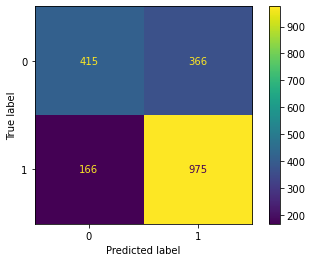

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(valid_label, bow1_mnb_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Text(0, 0.5, 'TPR')

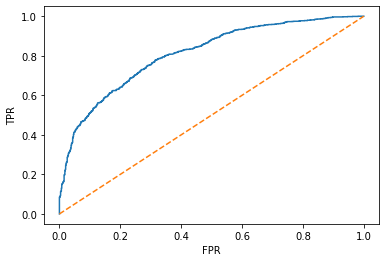

In [38]:
#ROC Curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr,tpr,thr=roc_curve(valid_label, bow1_mnb_test_prob[:,1])

plt.plot(fpr,tpr)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")

### Naive Bayes Complement

In [39]:
bow1_cnb_cv_mean_score, bow1_cnb_test_auc_score, bow1_cnb_test_accuracy_score, bow1_cnb_test_f1_score, bow1_cnb_test_prob, bow1_cnb_test_pred=models.naive_bayes_cnb(cv_train_features, cv_valid_features, train_label, valid_label,alpha=1,cv=5)
print('Unigram BoW + CNB Train mean CV AUC score >> ', bow1_cnb_cv_mean_score)
print('Unigram BoW + CNB Valid AUC score >> ', bow1_cnb_test_auc_score)
print('Unigram BoW + CNB Valid Accuracy score >> ', bow1_cnb_test_accuracy_score)
print('Unigram BoW + CNB Valid F1 score >> ', bow1_cnb_test_f1_score)

Unigram BoW + CNB Train mean CV AUC score >>  0.7755179707523132
Unigram BoW + CNB Valid AUC score >>  0.8101290397151453
Unigram BoW + CNB Valid Accuracy score >>  0.7351716961498439
Unigram BoW + CNB Valid F1 score >>  0.7836804079898003


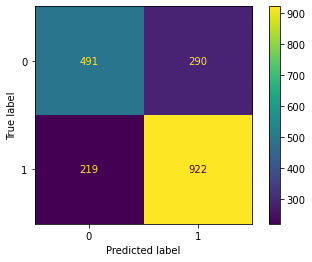

In [40]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(valid_label, bow1_cnb_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Text(0, 0.5, 'TPR')

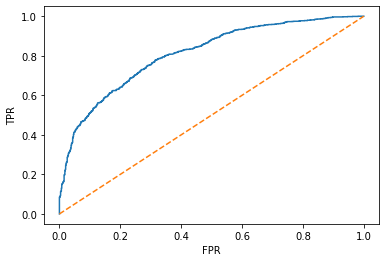

In [41]:
#ROC Curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr,tpr,thr=roc_curve(valid_label, bow1_cnb_test_prob[:,1])

plt.plot(fpr,tpr)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")

### Logistic Regression

In [42]:
bow1_lr_cv_mean_score, bow1_lr_test_auc_score, bow1_lr_test_accuracy_score, bow1_lr_test_f1_score, bow1_lr_test_prob, bow1_lr_test_pred=models.logistic_model(cv_train_features, cv_valid_features, train_label, valid_label,5)
print('Unigram BoW + LR Train mean CV AUC score >> ', bow1_lr_cv_mean_score)
print('Unigram BoW + LR Valid AUC score >> ', bow1_lr_test_auc_score)
print('Unigram BoW + LR Valid Accuracy score >> ', bow1_lr_test_accuracy_score)
print('Unigram BoW + LR Valid F1 score >> ', bow1_lr_test_f1_score)

Unigram BoW + LR Train mean CV AUC score >>  0.7868137096518998
Unigram BoW + LR Valid AUC score >>  0.8114015941718353
Unigram BoW + LR Valid Accuracy score >>  0.7471383975026015
Unigram BoW + LR Valid F1 score >>  0.7874015748031495


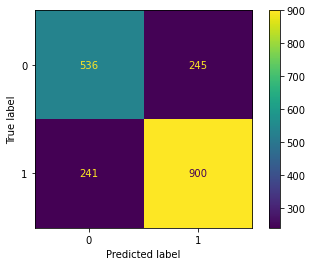

In [43]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(valid_label, bow1_lr_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Text(0, 0.5, 'TPR')

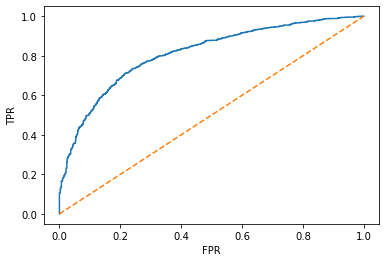

In [44]:
#ROC Curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr,tpr,thr=roc_curve(valid_label, bow1_lr_test_prob[:,1])

plt.plot(fpr,tpr)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")

### SVM

In [45]:
bow1_svm_cv_mean_score, bow1_svm_test_auc_score, bow1_svm_test_accuracy_score, bow1_svm_test_f1_score,bow1_svm_test_df, bow1_svm_test_pred=models.svm_model(cv_train_features, cv_valid_features, train_label, valid_label,5)
print('Unigram BoW + SVM Train mean CV AUC score >> ', bow1_svm_cv_mean_score)
print('Unigram BoW + SVM Valid AUC score >> ', bow1_svm_test_auc_score)
print('Unigram BoW + SVM Valid Accuracy score >> ', bow1_svm_test_accuracy_score)
print('Unigram BoW + SVM Valid F1 score >> ', bow1_svm_test_f1_score)

C:\Users\Abou Assaly\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Abou Assaly\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Abou Assaly\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Abou Assaly\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Unigram BoW + SVM Train mean CV AUC score >>  0.7506531479479762
Unigram BoW + SVM Valid AUC score >>  0.7669485962063514
Unigram BoW + SVM Valid Accuracy score >>  0.7148803329864725
Unigram BoW + SVM Valid F1 score >>  0.7606986899563317


C:\Users\Abou Assaly\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


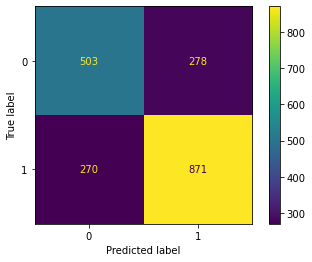

In [46]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(valid_label, bow1_svm_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Text(0, 0.5, 'TPR')

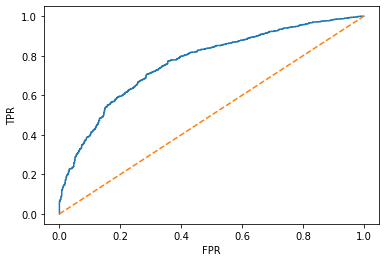

In [47]:
#ROC Curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr,tpr,thr=roc_curve(valid_label, bow1_svm_test_df)

plt.plot(fpr,tpr)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")

### SVM with Stochastic Gradient Descent

In [48]:
bow1_svm_sgd_cv_mean_score, bow1_svm_sgd_test_auc_score, bow1_svm_sgd_test_accuracy_score, bow1_svm_sgd_test_f1_score, bow1_svm_sgd_test_prob, bow1_svm_sgd_test_pred=models.svm_sgd_model(cv_train_features, cv_valid_features, train_label, valid_label,5)
print('Unigram BoW + SVM_SGD Train mean CV AUC score >> ', bow1_svm_sgd_cv_mean_score)
print('Unigram BoW + SVM_SGD Valid AUC score >> ', bow1_svm_sgd_test_auc_score)
print('Unigram BoW + SVM_SGD Valid Accuracy score >> ', bow1_svm_sgd_test_accuracy_score)
print('Unigram BoW + SVM_SGD Valid F1 score >> ', bow1_svm_sgd_test_f1_score)

Unigram BoW + SVM_SGD Train mean CV AUC score >>  0.7478696815731902
Unigram BoW + SVM_SGD Valid AUC score >>  0.7633346088802755
Unigram BoW + SVM_SGD Valid Accuracy score >>  0.7117585848074922
Unigram BoW + SVM_SGD Valid F1 score >>  0.7582897033158814


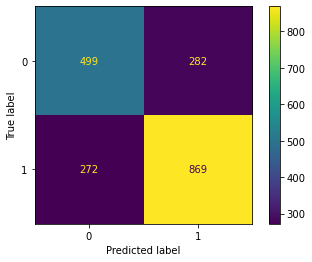

In [49]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(valid_label, bow1_svm_sgd_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Text(0, 0.5, 'TPR')

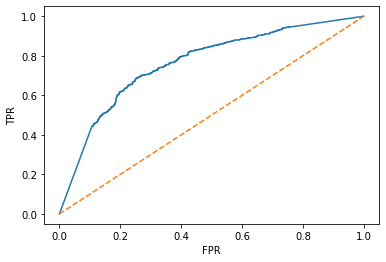

In [50]:
#ROC Curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr,tpr,thr=roc_curve(valid_label, bow1_svm_sgd_test_prob[:,1])

plt.plot(fpr,tpr)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")

### KNN

In [51]:
bow1_knn_cv_mean_score, bow1_knn_test_auc_score, bow1_knn_test_accuracy_score, bow1_knn_test_f1_score, bow1_knn_test_prob, bow1_knn_test_pred=models.knn_model(cv_train_features, cv_valid_features, train_label, valid_label,5,5)
print('Unigram BoW + KNN Train mean CV AUC score >> ', bow1_knn_cv_mean_score)
print('Unigram BoW + KNN Valid AUC score >> ', bow1_knn_test_auc_score)
print('Unigram BoW + KNN Valid Accuracy score >> ', bow1_knn_test_accuracy_score)
print('Unigram BoW + KNN Valid F1 score >> ', bow1_knn_test_f1_score)

Unigram BoW + KNN Train mean CV AUC score >>  0.6654960606079152
Unigram BoW + KNN Valid AUC score >>  0.6877601358289167
Unigram BoW + KNN Valid Accuracy score >>  0.6222684703433923
Unigram BoW + KNN Valid F1 score >>  0.6234439834024896


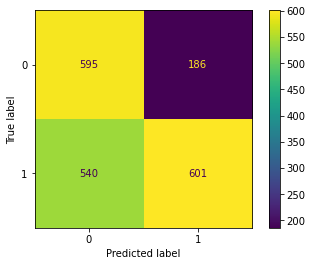

In [52]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(valid_label, bow1_knn_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Text(0, 0.5, 'TPR')

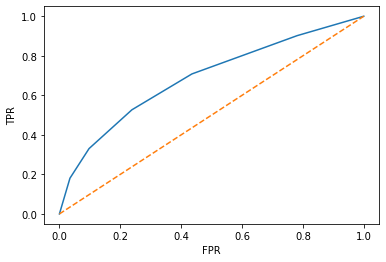

In [53]:
#ROC Curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr,tpr,thr=roc_curve(valid_label, bow1_knn_test_prob[:,1])

plt.plot(fpr,tpr)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")

### Random Forest

In [54]:
bow1_rfc_cv_mean_score, bow1_rfc_test_auc_score, bow1_rfc_test_accuracy_score, bow1_rfc_test_f1_score, bow1_rfc_test_prob, bow1_rfc_test_pred=models.random_forest_model(cv_train_features, cv_valid_features, train_label, valid_label,5)
print('Unigram BoW + RFC Train mean CV AUC score >> ', bow1_rfc_cv_mean_score)
print('Unigram BoW + RFC Valid AUC score >> ', bow1_rfc_test_auc_score)
print('Unigram BoW + RFC Valid Accuracy score >> ', bow1_rfc_test_accuracy_score)
print('Unigram BoW + RFC Valid F1 score >> ', bow1_rfc_test_f1_score)

Unigram BoW + RFC Train mean CV AUC score >>  0.750844281910898
Unigram BoW + RFC Valid AUC score >>  0.7640752490402538
Unigram BoW + RFC Valid Accuracy score >>  0.6914672216441207
Unigram BoW + RFC Valid F1 score >>  0.722248243559719


### Gradient Boosting

In [55]:
bow1_gbc_cv_mean_score, bow1_gbc_test_auc_score, bow1_gbc_test_accuracy_score, bow1_gbc_test_f1_score, bow1_gbc_test_prob, bow1_gbc_test_pred=models.gradient_boosting_model(cv_train_features, cv_valid_features, train_label, valid_label,5)
print('Unigram BoW + GBC Train mean CV AUC score >> ', bow1_gbc_cv_mean_score)
print('Unigram BoW + GBC Valid AUC score >> ', bow1_gbc_test_auc_score)
print('Unigram BoW + GBC Valid Accuracy score >> ', bow1_gbc_test_accuracy_score)
print('Unigram BoW + GBC Valid F1 score >> ', bow1_gbc_test_f1_score)

Unigram BoW + GBC Train mean CV AUC score >>  0.677118566694101
Unigram BoW + GBC Valid AUC score >>  0.6858081001345496
Unigram BoW + GBC Valid Accuracy score >>  0.5936524453694069
Unigram BoW + GBC Valid F1 score >>  0.7450212210251388


## BOW (bigram)

In [56]:
cv2_train_features,cv2_valid_features = fe.bow_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(2,2),max_features=None)
print('Bigram BOW model:> Train features shape:', cv2_train_features.shape,' Validation features shape:', cv2_valid_features.shape)

Bigram BOW model:> Train features shape: (15383, 134633)  Validation features shape: (1922, 134633)


### Naive Bayes Multinomial

In [57]:
bow2_mnb_cv_mean_score, bow2_mnb_test_auc_score, bow2_mnb_test_accuracy_score, bow2_mnb_test_f1_score, bow2_mnb_test_prob, bow2_mnb_test_pred=models.naive_bayes_model(cv2_train_features, cv2_valid_features, train_label, valid_label,5)
print('Bigram BoW + MNB Train mean CV AUC score >> ', bow2_mnb_cv_mean_score)
print('Bigram BoW + MNB Valid AUC score >> ', bow2_mnb_test_auc_score)
print('Bigram BoW + MNB Valid Accuracy score >> ', bow2_mnb_test_accuracy_score)
print('Bigram BoW + MNB Valid F1 score >> ', bow2_mnb_test_f1_score)

Bigram BoW + MNB Train mean CV AUC score >>  0.6521944281471752
Bigram BoW + MNB Valid AUC score >>  0.73373930139678
Bigram BoW + MNB Valid Accuracy score >>  0.6701352757544224
Bigram BoW + MNB Valid F1 score >>  0.7501970055161545


### Naive Bayes Complement

In [58]:
bow2_cnb_cv_mean_score, bow2_cnb_test_auc_score, bow2_cnb_test_accuracy_score, bow2_cnb_test_f1_score, bow2_cnb_test_prob, bow2_cnb_test_pred=models.naive_bayes_cnb(cv2_train_features, cv2_valid_features, train_label, valid_label,alpha=1,cv=5)
print('Bigram BoW + CNB Train mean CV AUC score >> ', bow2_cnb_cv_mean_score)
print('Bigram BoW + CNB Valid AUC score >> ', bow2_cnb_test_auc_score)
print('Bigram BoW + CNB Valid Accuracy score >> ', bow2_cnb_test_accuracy_score)
print('Bigram BoW + CNB Valid F1 score >> ', bow2_cnb_test_f1_score)

Bigram BoW + CNB Train mean CV AUC score >>  0.6521927637560931
Bigram BoW + CNB Valid AUC score >>  0.7337533286725371
Bigram BoW + CNB Valid Accuracy score >>  0.6768990634755463
Bigram BoW + CNB Valid F1 score >>  0.7136929460580913


### Logistic Regression

In [59]:
bow2_lr_cv_mean_score, bow2_lr_test_auc_score, bow2_lr_test_accuracy_score, bow2_lr_test_f1_score, bow2_lr_test_prob, bow2_lr_test_pred=models.logistic_model(cv2_train_features, cv2_valid_features, train_label, valid_label,5)
print('Bigram BoW + LR Train mean CV AUC score >> ', bow2_lr_cv_mean_score)
print('Bigram BoW + LR Valid AUC score >> ', bow2_lr_test_auc_score)
print('Bigram BoW + LR Valid Accuracy score >> ', bow2_lr_test_accuracy_score)
print('Bigram BoW + LR Valid F1 score >> ', bow2_lr_test_f1_score)

Bigram BoW + LR Train mean CV AUC score >>  0.6777961651083689
Bigram BoW + LR Valid AUC score >>  0.7275673000636278
Bigram BoW + LR Valid Accuracy score >>  0.6514047866805411
Bigram BoW + LR Valid F1 score >>  0.7488755622188905


### SVM

In [60]:
bow2_svm_cv_mean_score, bow2_svm_test_auc_score, bow2_svm_test_accuracy_score, bow2_svm_test_f1_score,bow2_svm_test_df, bow2_svm_test_pred=models.svm_model(cv2_train_features, cv2_valid_features, train_label, valid_label,5)
print('Bigram BoW + SVM Train mean CV AUC score >> ', bow2_svm_cv_mean_score)
print('Bigram BoW + SVM Valid AUC score >> ', bow2_svm_test_auc_score)
print('Bigram BoW + SVM Valid Accuracy score >> ', bow2_svm_test_accuracy_score)
print('Bigram BoW + SVM Valid F1 score >> ', bow2_svm_test_f1_score)

Bigram BoW + SVM Train mean CV AUC score >>  0.664711900862683
Bigram BoW + SVM Valid AUC score >>  0.7056364960538468
Bigram BoW + SVM Valid Accuracy score >>  0.6555671175858481
Bigram BoW + SVM Valid F1 score >>  0.7284659557013946


### SVM with Stochastic Gradient Descent

In [61]:
bow2_svm_sgd_cv_mean_score, bow2_svm_sgd_test_auc_score, bow2_svm_sgd_test_accuracy_score, bow2_svm_sgd_test_f1_score, bow2_svm_sgd_test_prob, bow2_svm_sgd_test_pred=models.svm_sgd_model(cv2_train_features, cv2_valid_features, train_label, valid_label,5)
print('Bigram BoW + SVM_SGD Train mean CV AUC score >> ', bow2_svm_sgd_cv_mean_score)
print('Bigram BoW + SVM_SGD Valid AUC score >> ', bow2_svm_sgd_test_auc_score)
print('Bigram BoW + SVM_SGD Valid Accuracy score >> ', bow2_svm_sgd_test_accuracy_score)
print('Bigram BoW + SVM_SGD Valid F1 score >> ', bow2_svm_sgd_test_f1_score)

Bigram BoW + SVM_SGD Train mean CV AUC score >>  0.6575962963929355
Bigram BoW + SVM_SGD Valid AUC score >>  0.7018283712312919
Bigram BoW + SVM_SGD Valid Accuracy score >>  0.6524453694068678
Bigram BoW + SVM_SGD Valid F1 score >>  0.7269010629599346


### KNN

In [62]:
bow2_knn_cv_mean_score, bow2_knn_test_auc_score, bow2_knn_test_accuracy_score, bow2_knn_test_f1_score, bow2_knn_test_prob, bow2_knn_test_pred=models.knn_model(cv2_train_features, cv2_valid_features, train_label, valid_label,5,5)
print('Bigram BoW + KNN Train mean CV AUC score >> ', bow2_knn_cv_mean_score)
print('Bigram BoW + KNN Valid AUC score >> ', bow2_knn_test_auc_score)
print('Bigram BoW + KNN Valid Accuracy score >> ', bow2_knn_test_accuracy_score)
print('Bigram BoW + KNN Valid F1 score >> ', bow2_knn_test_f1_score)

Bigram BoW + KNN Train mean CV AUC score >>  0.5179772737680342
Bigram BoW + KNN Valid AUC score >>  0.5048124777667679
Bigram BoW + KNN Valid Accuracy score >>  0.5135275754422477
Bigram BoW + KNN Valid F1 score >>  0.5868316394167036


### Random Forest

In [63]:
bow2_rfc_cv_mean_score, bow2_rfc_test_auc_score, bow2_rfc_test_accuracy_score, bow2_rfc_test_f1_score, bow2_rfc_test_prob, bow2_rfc_test_pred=models.random_forest_model(cv2_train_features, cv2_valid_features, train_label, valid_label,5)
print('Bigram BoW + RFC Train mean CV AUC score >> ', bow2_rfc_cv_mean_score)
print('Bigram BoW + RFC Valid AUC score >> ', bow2_rfc_test_auc_score)
print('Bigram BoW + RFC Valid Accuracy score >> ', bow2_rfc_test_accuracy_score)
print('Bigram BoW + RFC Valid F1 score >> ', bow2_rfc_test_f1_score)

Bigram BoW + RFC Train mean CV AUC score >>  0.6190466104743473
Bigram BoW + RFC Valid AUC score >>  0.6682824218035486
Bigram BoW + RFC Valid Accuracy score >>  0.5967741935483871
Bigram BoW + RFC Valid F1 score >>  0.6003094378545643


### Gradient Boosting

In [64]:
bow2_gbc_cv_mean_score, bow2_gbc_test_auc_score, bow2_gbc_test_accuracy_score, bow2_gbc_test_f1_score, bow2_gbc_test_prob, bow2_gbc_test_pred=models.gradient_boosting_model(cv2_train_features, cv2_valid_features, train_label, valid_label,5)
print('Bigram BoW + GBC Train mean CV AUC score >> ', bow2_gbc_cv_mean_score)
print('Bigram BoW + GBC Valid AUC score >> ', bow2_gbc_test_auc_score)
print('Bigram BoW + GBC Valid Accuracy score >> ', bow2_gbc_test_accuracy_score)
print('Bigram BoW + GBC Valid F1 score >> ', bow2_gbc_test_f1_score)

Bigram BoW + GBC Train mean CV AUC score >>  0.5313592735520496
Bigram BoW + GBC Valid AUC score >>  0.5407183760678964
Bigram BoW + GBC Valid Accuracy score >>  0.6019771071800208
Bigram BoW + GBC Valid F1 score >>  0.7474413998019149


## TF-IDF (unigram)

In [65]:
tv_train_features,tv_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_features.shape,' Validation features shape:', tv_valid_features.shape)

TFIDF model:> Train features shape: (15383, 17188)  Validation features shape: (1922, 17188)


### Naive Bayes Multinomial

In [66]:
tv_mnb_cv_mean_score, tv_mnb_test_auc_score, tv_mnb_test_accuracy_score, tv_mnb_test_f1_score, tv_mnb_test_prob, tv_mnb_test_pred=models.naive_bayes_model(tv_train_features, tv_valid_features, train_label, valid_label,5)
print('Unigram Tf-IDF + MNB Train mean CV AUC score >> ', tv_mnb_cv_mean_score)
print('Unigram Tf-IDF + MNB Valid AUC score >> ', tv_mnb_test_auc_score)
print('Unigram Tf-IDF + MNB Valid Accuracy score >> ', tv_mnb_test_accuracy_score)
print('Unigram Tf-IDF + MNB Valid F1 score >> ', tv_mnb_test_f1_score)

Unigram Tf-IDF + MNB Train mean CV AUC score >>  0.767443897632152
Unigram Tf-IDF + MNB Valid AUC score >>  0.8009400519121421
Unigram Tf-IDF + MNB Valid Accuracy score >>  0.6690946930280958
Unigram Tf-IDF + MNB Valid F1 score >>  0.7752650176678446


### Naive Bayes Complement

In [67]:
tv_cnb_cv_mean_score, tv_cnb_test_auc_score, tv_cnb_test_accuracy_score, tv_cnb_test_f1_score, tv_cnb_test_prob, tv_cnb_test_pred=models.naive_bayes_cnb(tv_train_features, tv_valid_features, train_label, valid_label,alpha=1,cv=5)
print('Unigram Tf-IDF + CNB Train mean CV AUC score >> ', tv_cnb_cv_mean_score)
print('Unigram Tf-IDF + CNB Valid AUC score >> ', tv_cnb_test_auc_score)
print('Unigram Tf-IDF + CNB Valid Accuracy score >> ', tv_cnb_test_accuracy_score)
print('Unigram Tf-IDF + CNB Valid F1 score >> ', tv_cnb_test_f1_score)

Unigram Tf-IDF + CNB Train mean CV AUC score >>  0.767443897632152
Unigram Tf-IDF + CNB Valid AUC score >>  0.8009400519121421
Unigram Tf-IDF + CNB Valid Accuracy score >>  0.7200832466181062
Unigram Tf-IDF + CNB Valid F1 score >>  0.7853152434158021


### Logistic Regression

In [68]:
tv_lr_cv_mean_score, tv_lr_test_auc_score, tv_lr_test_accuracy_score, tv_lr_test_f1_score, tv_lr_test_prob, tv_lr_test_pred=models.logistic_model(tv_train_features, tv_valid_features, train_label, valid_label,5)
print('Unigram Tf-IDF + LR Train mean CV AUC score >> ', tv_lr_cv_mean_score)
print('Unigram Tf-IDF + LR Valid AUC score >> ', tv_lr_test_auc_score)
print('Unigram Tf-IDF + LR Valid Accuracy score >> ', tv_lr_test_accuracy_score)
print('Unigram Tf-IDF + LR Valid F1 score >> ', tv_lr_test_f1_score)

Unigram Tf-IDF + LR Train mean CV AUC score >>  0.7871181105417007
Unigram Tf-IDF + LR Valid AUC score >>  0.8153006157412965
Unigram Tf-IDF + LR Valid Accuracy score >>  0.7460978147762747
Unigram Tf-IDF + LR Valid F1 score >>  0.7918088737201364


### SVM

In [69]:
tv_svm_cv_mean_score, tv_svm_test_auc_score, tv_svm_test_accuracy_score, tv_svm_test_f1_score,tv_svm_test_df, tv_svm_test_pred=models.svm_model(tv_train_features, tv_valid_features, train_label, valid_label,5)
print('Unigram Tf-IDF + SVM Train mean CV AUC score >> ', tv_svm_cv_mean_score)
print('Unigram Tf-IDF + SVM Valid AUC score >> ', tv_svm_test_auc_score)
print('Unigram Tf-IDF + SVM Valid Accuracy score >> ', tv_svm_test_accuracy_score)
print('Unigram Tf-IDF + SVM Valid F1 score >> ', tv_svm_test_f1_score)

Unigram Tf-IDF + SVM Train mean CV AUC score >>  0.7684408789592027
Unigram Tf-IDF + SVM Valid AUC score >>  0.7971066779932242
Unigram Tf-IDF + SVM Valid Accuracy score >>  0.7299687825182102
Unigram Tf-IDF + SVM Valid F1 score >>  0.7773487773487773


### SVM with Stochastic Gradient Descent


In [70]:
tv_svm_sgd_cv_mean_score, tv_svm_sgd_test_auc_score, tv_svm_sgd_test_accuracy_score, tv_svm_sgd_test_f1_score, tv_svm_sgd_test_prob, tv_svm_sgd_test_pred=models.svm_sgd_model(tv_train_features, tv_valid_features, train_label, valid_label,5)
print('Unigram Tf-IDF + SVM_SGD Train mean CV AUC score >> ', tv_svm_sgd_cv_mean_score)
print('Unigram Tf-IDF + SVM_SGD Valid AUC score >> ', tv_svm_sgd_test_auc_score)
print('Unigram Tf-IDF + SVM_SGD Valid Accuracy score >> ', tv_svm_sgd_test_accuracy_score)
print('Unigram Tf-IDF + SVM_SGD Valid F1 score >> ', tv_svm_sgd_test_f1_score)

Unigram Tf-IDF + SVM_SGD Train mean CV AUC score >>  0.7713896069766755
Unigram Tf-IDF + SVM_SGD Valid AUC score >>  0.8027540592130586
Unigram Tf-IDF + SVM_SGD Valid Accuracy score >>  0.736732570239334
Unigram Tf-IDF + SVM_SGD Valid F1 score >>  0.7813310285220397


### KNN


In [71]:
tv_knn_cv_mean_score, tv_knn_test_auc_score, tv_knn_test_accuracy_score, tv_knn_test_f1_score, tv_knn_test_prob, tv_knn_test_pred=models.knn_model(tv_train_features, tv_valid_features, train_label, valid_label,5,5)
print('Unigram Tf-IDF + KNN Train mean CV AUC score >> ', tv_knn_cv_mean_score)
print('Unigram Tf-IDF + KNN Valid AUC score >> ', tv_knn_test_auc_score)
print('Unigram Tf-IDF + KNN Valid Accuracy score >> ', tv_knn_test_accuracy_score)
print('Unigram Tf-IDF + KNN Valid F1 score >> ', tv_knn_test_f1_score)

Unigram Tf-IDF + KNN Train mean CV AUC score >>  0.517647622102923
Unigram Tf-IDF + KNN Valid AUC score >>  0.5260239630757215
Unigram Tf-IDF + KNN Valid Accuracy score >>  0.44849115504682624
Unigram Tf-IDF + KNN Valid F1 score >>  0.2524682651622003


### Random Forest

In [72]:
tv_rfc_cv_mean_score, tv_rfc_test_auc_score, tv_rfc_test_accuracy_score, tv_rfc_test_f1_score, tv_rfc_test_prob, tv_rfc_test_pred=models.random_forest_model(tv_train_features, tv_valid_features, train_label, valid_label,5)
print('Unigram Tf-IDF + RFC Train mean CV AUC score >> ', tv_rfc_cv_mean_score)
print('Unigram Tf-IDF + RFC Valid AUC score >> ', tv_rfc_test_auc_score)
print('Unigram Tf-IDF + RFC Valid Accuracy score >> ', tv_rfc_test_accuracy_score)
print('Unigram Tf-IDF + RFC Valid F1 score >> ', tv_rfc_test_f1_score)

Unigram Tf-IDF + RFC Train mean CV AUC score >>  0.7420156534325036
Unigram Tf-IDF + RFC Valid AUC score >>  0.7672532686357969
Unigram Tf-IDF + RFC Valid Accuracy score >>  0.700312174817898
Unigram Tf-IDF + RFC Valid F1 score >>  0.7369863013698629


### Gradient Boosting

In [73]:
tv_gbc_cv_mean_score, tv_gbc_test_auc_score, tv_gbc_test_accuracy_score, tv_gbc_test_f1_score, tv_gbc_test_prob, tv_gbc_test_pred=models.gradient_boosting_model(tv_train_features, tv_valid_features, train_label, valid_label,5)
print('Unigram Tf-IDF + GBC Train mean CV AUC score >> ', tv_gbc_cv_mean_score)
print('Unigram Tf-IDF + GBC Valid AUC score >> ', tv_gbc_test_auc_score)
print('Unigram Tf-IDF + GBC Valid Accuracy score >> ', tv_gbc_test_accuracy_score)
print('Unigram Tf-IDF + GBC Valid F1 score >> ', tv_gbc_test_f1_score)

Unigram Tf-IDF + GBC Train mean CV AUC score >>  0.6814625508406099
Unigram Tf-IDF + GBC Valid AUC score >>  0.683208565391232
Unigram Tf-IDF + GBC Valid Accuracy score >>  0.5931321540062435
Unigram Tf-IDF + GBC Valid F1 score >>  0.744611365120836


## TF-IDF (bigram)

In [74]:
tv2_train_features,tv2_valid_features = fe.tfidf_vectors(norm_train_corpus, norm_valid_corpus,ngram_range=(2,2),max_features=None)
print('TFIDF model:> Train features shape:', tv2_train_features.shape,' Validation features shape:', tv2_valid_features.shape)

TFIDF model:> Train features shape: (15383, 134633)  Validation features shape: (1922, 134633)


### Naive Bayes Multinomial

In [75]:
tv2_mnb_cv_mean_score, tv2_mnb_test_auc_score, tv2_mnb_test_accuracy_score, tv2_mnb_test_f1_score, tv2_mnb_test_prob, tv2_mnb_test_pred=models.naive_bayes_model(tv2_train_features, tv2_valid_features, train_label, valid_label,5)
print('Bigram Tf-IDF + MNB Train mean CV AUC score >> ', tv2_mnb_cv_mean_score)
print('Bigram Tf-IDF + MNB Valid AUC score >> ', tv2_mnb_test_auc_score)
print('Bigram Tf-IDF + MNB Valid Accuracy score >> ', tv2_mnb_test_accuracy_score)
print('Bigram Tf-IDF + MNB Valid F1 score >> ', tv2_mnb_test_f1_score)

Bigram Tf-IDF + MNB Train mean CV AUC score >>  0.6699747748122998
Bigram Tf-IDF + MNB Valid AUC score >>  0.7364577874385184
Bigram Tf-IDF + MNB Valid Accuracy score >>  0.6399583766909469
Bigram Tf-IDF + MNB Valid F1 score >>  0.754609929078014


### Naive Bayes Complement

In [76]:
tv2_cnb_cv_mean_score, tv2_cnb_test_auc_score, tv2_cnb_test_accuracy_score, tv2_cnb_test_f1_score, tv2_cnb_test_prob, tv2_cnb_test_pred=models.naive_bayes_cnb(tv2_train_features, tv2_valid_features, train_label, valid_label,alpha=1,cv=5)
print('Bigram Tf-IDF + CNB Train mean CV AUC score >> ', tv2_cnb_cv_mean_score)
print('Bigram Tf-IDF + CNB Valid AUC score >> ', tv2_cnb_test_auc_score)
print('Bigram Tf-IDF + CNB Valid Accuracy score >> ', tv2_cnb_test_accuracy_score)
print('Bigram Tf-IDF + CNB Valid F1 score >> ', tv2_cnb_test_f1_score)

Bigram Tf-IDF + CNB Train mean CV AUC score >>  0.6699744243361536
Bigram Tf-IDF + CNB Valid AUC score >>  0.7364577874385184
Bigram Tf-IDF + CNB Valid Accuracy score >>  0.6815816857440167
Bigram Tf-IDF + CNB Valid F1 score >>  0.721565059144677


### Logistic Regression

In [77]:
tv2_lr_cv_mean_score, tv2_lr_test_auc_score, tv2_lr_test_accuracy_score, tv2_lr_test_f1_score, tv2_lr_test_prob, tv2_lr_test_pred=models.logistic_model(tv2_train_features, tv2_valid_features, train_label, valid_label,5)
print('Bigram Tf-IDF + LR Train mean CV AUC score >> ', tv2_lr_cv_mean_score)
print('Bigram Tf-IDF + LR Valid AUC score >> ', tv2_lr_test_auc_score)
print('Bigram Tf-IDF + LR Valid Accuracy score >> ', tv2_lr_test_accuracy_score)
print('Bigram Tf-IDF + LR Valid F1 score >> ', tv2_lr_test_f1_score)

Bigram Tf-IDF + LR Train mean CV AUC score >>  0.6808722011976852
Bigram Tf-IDF + LR Valid AUC score >>  0.7285166660868725
Bigram Tf-IDF + LR Valid Accuracy score >>  0.6331945889698231
Bigram Tf-IDF + LR Valid F1 score >>  0.7509713882020488


### SVM

In [78]:
tv2_svm_cv_mean_score, tv2_svm_test_auc_score, tv2_svm_test_accuracy_score, tv2_svm_test_f1_score,tv2_svm_test_df, tv2_svm_test_pred=models.svm_model(tv2_train_features, tv2_valid_features, train_label, valid_label,5)
print('Bigram Tf-IDF + SVM Train mean CV AUC score >> ', tv2_svm_cv_mean_score)
print('Bigram Tf-IDF + SVM Valid AUC score >> ', tv2_svm_test_auc_score)
print('Bigram Tf-IDF + SVM Valid Accuracy score >> ', tv2_svm_test_accuracy_score)
print('Bigram Tf-IDF + SVM Valid F1 score >> ', tv2_svm_test_f1_score)

Bigram Tf-IDF + SVM Train mean CV AUC score >>  0.6775461098189686
Bigram Tf-IDF + SVM Valid AUC score >>  0.7233024471424194
Bigram Tf-IDF + SVM Valid Accuracy score >>  0.6654526534859522
Bigram Tf-IDF + SVM Valid F1 score >>  0.7451446690447879


### SVM with Stochastic Gradient Descent

In [79]:
tv2_svm_sgd_cv_mean_score, tv2_svm_sgd_test_auc_score, tv2_svm_sgd_test_accuracy_score, tv2_svm_sgd_test_f1_score, tv2_svm_sgd_test_prob, tv2_svm_sgd_test_pred=models.svm_sgd_model(tv2_train_features, tv2_valid_features, train_label, valid_label,5)
print('Bigram Tf-IDF + SVM_SGD Train mean CV AUC score >> ', tv2_svm_sgd_cv_mean_score)
print('Bigram Tf-IDF + SVM_SGD Valid AUC score >> ', tv2_svm_sgd_test_auc_score)
print('Bigram Tf-IDF + SVM_SGD Valid Accuracy score >> ', tv2_svm_sgd_test_accuracy_score)
print('Bigram Tf-IDF + SVM_SGD Valid F1 score >> ', tv2_svm_sgd_test_f1_score)

Bigram Tf-IDF + SVM_SGD Train mean CV AUC score >>  0.6776062500081677
Bigram Tf-IDF + SVM_SGD Valid AUC score >>  0.7237939628849505
Bigram Tf-IDF + SVM_SGD Valid Accuracy score >>  0.663891779396462
Bigram Tf-IDF + SVM_SGD Valid F1 score >>  0.745067087608524


### KNN

In [80]:
tv2_knn_cv_mean_score, tv2_knn_test_auc_score, tv2_knn_test_accuracy_score, tv2_knn_test_f1_score, tv2_knn_test_prob, tv2_knn_test_pred=models.knn_model(tv2_train_features, tv2_valid_features, train_label, valid_label,5,5)
print('Bigram Tf-IDF + KNN Train mean CV AUC score >> ', tv2_knn_cv_mean_score)
print('Bigram Tf-IDF + KNN Valid AUC score >> ', tv2_knn_test_auc_score)
print('Bigram Tf-IDF + KNN Valid Accuracy score >> ', tv2_knn_test_accuracy_score)
print('Bigram Tf-IDF + KNN Valid F1 score >> ', tv2_knn_test_f1_score)

Bigram Tf-IDF + KNN Train mean CV AUC score >>  0.4996727261705061
Bigram Tf-IDF + KNN Valid AUC score >>  0.5314766457080463
Bigram Tf-IDF + KNN Valid Accuracy score >>  0.4750260145681582
Bigram Tf-IDF + KNN Valid F1 score >>  0.3689806128830519


### Random Forest

In [81]:
tv2_rfc_cv_mean_score, tv2_rfc_test_auc_score, tv2_rfc_test_accuracy_score, tv2_rfc_test_f1_score, tv2_rfc_test_prob, tv2_rfc_test_pred=models.random_forest_model(tv2_train_features, tv2_valid_features, train_label, valid_label,5)
print('Bigram Tf-IDF + RFC Train mean CV AUC score >> ', tv2_rfc_cv_mean_score)
print('Bigram Tf-IDF + RFC Valid AUC score >> ', tv2_rfc_test_auc_score)
print('Bigram Tf-IDF + RFC Valid Accuracy score >> ', tv2_rfc_test_accuracy_score)
print('Bigram Tf-IDF + RFC Valid F1 score >> ', tv2_rfc_test_f1_score)

Bigram Tf-IDF + RFC Train mean CV AUC score >>  0.6127455118281777
Bigram Tf-IDF + RFC Valid AUC score >>  0.6771667371771062
Bigram Tf-IDF + RFC Valid Accuracy score >>  0.586888657648283
Bigram Tf-IDF + RFC Valid F1 score >>  0.5651697699890471


### Gradient Boosting

In [82]:
tv2_gbc_cv_mean_score, tv2_gbc_test_auc_score, tv2_gbc_test_accuracy_score, tv2_gbc_test_f1_score, tv2_gbc_test_prob, tv2_gbc_test_pred=models.gradient_boosting_model(tv2_train_features, tv2_valid_features, train_label, valid_label,5)
print('Bigram Tf-IDF + GBC Train mean CV AUC score >> ', tv2_gbc_cv_mean_score)
print('Bigram Tf-IDF + GBC Valid AUC score >> ', tv2_gbc_test_auc_score)
print('Bigram Tf-IDF + GBC Valid Accuracy score >> ', tv2_gbc_test_accuracy_score)
print('Bigram Tf-IDF + GBC Valid F1 score >> ', tv2_gbc_test_f1_score)

Bigram Tf-IDF + GBC Train mean CV AUC score >>  0.5316544141811926
Bigram Tf-IDF + GBC Valid AUC score >>  0.5356034702358042
Bigram Tf-IDF + GBC Valid Accuracy score >>  0.6004162330905307
Bigram Tf-IDF + GBC Valid F1 score >>  0.7467018469656991


## Pretrained word embedding (Glove 100d)

In [83]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [84]:
glove_file = datapath('D:/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [85]:
import time
ts = time.time()
model_glove = KeyedVectors.load_word2vec_format(word2vec_glove_file)
te = time.time() - ts
print('training time = {0:.2f} minutes'.format(te/60))

training time = 0.75 minutes


In [86]:
#show a word embedding
model_glove['king']

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [87]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

In [88]:
# tokenize corpus
tokenized_train = [tokenize_text(text) for text in norm_train_corpus]
tokenized_valid = [tokenize_text(text) for text in norm_valid_corpus]

In [89]:
tokenized_train[0]

['continu',
 'call',
 'feminist',
 'right',
 'womxn',
 'arent',
 'address',
 'ye',
 'sexual',
 'offenc',
 'public',
 'list',
 'tran',
 'lesbian',
 'bisexu',
 'queer',
 'womxn',
 'abl',
 'enter',
 'inform',
 'report',
 'sheet',
 'gender',
 'forum']

In [90]:
#for each sentence in the tokenized data, I will be calculating the mean of the word embedding of all the words in the sentence
#funtion definition
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,),dtype="float64") #array with 0 values
    nwords = 0.
    for word in words:
        if word in model:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords) #to find the mean of each word embedding
    return feature_vector

In [91]:
#function to be called on the whole tokenized corpus. It will call the average_word_vectors function to generate the features
def averaged_word_vectorizer(corpus, model, num_features):
    features = [average_word_vectors(tokenized_sentence, model,num_features) 
                for tokenized_sentence in corpus]
    return np.array(features)

In [92]:
# Apply word embedding on train dataset
embed_train_feature_array = averaged_word_vectorizer(corpus=tokenized_train,model=model_glove,num_features=100)
# Apply word embedding on valid dataset
embed_valid_feature_array = averaged_word_vectorizer(corpus=tokenized_valid,model=model_glove, num_features=100) 

In [93]:
print('Pretrained Word Embedding model:> Train features shape:', embed_train_feature_array.shape,' Valid features shape:', embed_valid_feature_array.shape)

Pretrained Word Embedding model:> Train features shape: (15383, 100)  Valid features shape: (1922, 100)


### Naive Bayes Multinomial

In [94]:
#Naive Bayes model does not work on arrays with negative values. 
#Accordingly I will be assigning N/A to the scores to be added later on to the table
embed_mnb_cv_mean_score = 'N/A'
embed_mnb_test_auc_score = 'N/A'
embed_mnb_test_accuracy_score = 'N/A'
embed_mnb_test_f1_score = 'N/A'

### Naive Bayes Complement

In [95]:
#Naive Bayes model does not work on arrays with negative values. 
#Accordingly I will be assigning N/A to the scores to be added later on to the table
embed_cnb_cv_mean_score = 'N/A'
embed_cnb_test_auc_score = 'N/A'
embed_cnb_test_accuracy_score = 'N/A'
embed_cnb_test_f1_score = 'N/A'

### Logistic Regression

In [96]:
embed_lr_cv_mean_score, embed_lr_test_auc_score, embed_lr_test_accuracy_score, embed_lr_test_f1_score, embed_lr_test_prob, embed_lr_test_pred=models.logistic_model(embed_train_feature_array, embed_valid_feature_array, train_label, valid_label,5)
print('Glove Pretrained + LR Train mean CV AUC score >> ', embed_lr_cv_mean_score)
print('Glove Pretrained + LR Valid AUC score >> ', embed_lr_test_auc_score)
print('Glove Pretrained + LR Valid Accuracy score >> ', embed_lr_test_accuracy_score)
print('Glove Pretrained + LR Valid F1 score >> ', embed_lr_test_f1_score)

Glove Pretrained + LR Train mean CV AUC score >>  0.6893000685796709
Glove Pretrained + LR Valid AUC score >>  0.6912893984094192
Glove Pretrained + LR Valid Accuracy score >>  0.6493236212278877
Glove Pretrained + LR Valid F1 score >>  0.7295345104333869


### SVM

In [97]:
embed_svm_cv_mean_score, embed_svm_test_auc_score, embed_svm_test_accuracy_score, embed_svm_test_f1_score,embed_svm_test_df, embed_svm_test_pred=models.svm_model(embed_train_feature_array, embed_valid_feature_array, train_label, valid_label,5)
print('Glove Pretrained + SVM Train mean CV AUC score >> ', embed_svm_cv_mean_score)
print('Glove Pretrained + SVM Valid AUC score >> ', embed_svm_test_auc_score)
print('Glove Pretrained + SVM Valid Accuracy score >> ', embed_svm_test_accuracy_score)
print('Glove Pretrained + SVM Valid F1 score >> ', embed_svm_test_f1_score)

C:\Users\Abou Assaly\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Abou Assaly\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Abou Assaly\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Glove Pretrained + SVM Train mean CV AUC score >>  0.6871369258436101
Glove Pretrained + SVM Valid AUC score >>  0.6895174729357741
Glove Pretrained + SVM Valid Accuracy score >>  0.6462018730489074
Glove Pretrained + SVM Valid F1 score >>  0.7290836653386454


### SVM with Stochastic Gradient Descent

In [98]:
embed_svm_sgd_cv_mean_score, embed_svm_sgd_test_auc_score, embed_svm_sgd_test_accuracy_score, embed_svm_sgd_test_f1_score, embed_svm_sgd_test_prob, embed_svm_sgd_test_pred=models.svm_sgd_model(embed_train_feature_array, embed_valid_feature_array, train_label, valid_label,5,max_iter=1000)
print('Glove Pretrained + SVM_SGD Train mean CV AUC score >> ', embed_svm_sgd_cv_mean_score)
print('Glove Pretrained + SVM_SGD Valid AUC score >> ', embed_svm_sgd_test_auc_score)
print('Glove Pretrained + SVM_SGD Valid Accuracy score >> ', embed_svm_sgd_test_accuracy_score)
print('Glove Pretrained + SVM_SGD Valid F1 score >> ', embed_svm_sgd_test_f1_score)

Glove Pretrained + SVM_SGD Train mean CV AUC score >>  0.6708888607222985
Glove Pretrained + SVM_SGD Valid AUC score >>  0.6808463721537255
Glove Pretrained + SVM_SGD Valid Accuracy score >>  0.649843912591051
Glove Pretrained + SVM_SGD Valid F1 score >>  0.7392483533514141


### KNN

In [99]:
embed_knn_cv_mean_score, embed_knn_test_auc_score, embed_knn_test_accuracy_score, embed_knn_test_f1_score, embed_knn_test_prob, embed_knn_test_pred=models.knn_model(embed_train_feature_array, embed_valid_feature_array, train_label, valid_label,5,5)
print('Glove Pretrained + KNN Train mean CV AUC score >> ', embed_knn_cv_mean_score)
print('Glove Pretrained + KNN Valid AUC score >> ', embed_knn_test_auc_score)
print('Glove Pretrained + KNN Valid Accuracy score >> ', embed_knn_test_accuracy_score)
print('Glove Pretrained + KNN Valid F1 score >> ', embed_knn_test_f1_score)

Glove Pretrained + KNN Train mean CV AUC score >>  0.6390829968747095
Glove Pretrained + KNN Valid AUC score >>  0.6600787098497286
Glove Pretrained + KNN Valid Accuracy score >>  0.631633714880333
Glove Pretrained + KNN Valid F1 score >>  0.7236533957845434


### Random Forest

In [100]:
embed_rfc_cv_mean_score, embed_rfc_test_auc_score, embed_rfc_test_accuracy_score, embed_rfc_test_f1_score, embed_rfc_test_prob, embed_rfc_test_pred=models.random_forest_model(embed_train_feature_array, embed_valid_feature_array, train_label, valid_label,5)
print('Glove Pretrained + RFC Train mean CV AUC score >> ', embed_rfc_cv_mean_score)
print('Glove Pretrained + RFC Valid AUC score >> ', embed_rfc_test_auc_score)
print('Glove Pretrained + RFC Valid Accuracy score >> ', embed_rfc_test_accuracy_score)
print('Glove Pretrained + RFC Valid F1 score >> ', embed_rfc_test_f1_score)

Glove Pretrained + RFC Train mean CV AUC score >>  0.641915288027031
Glove Pretrained + RFC Valid AUC score >>  0.6474760442184619
Glove Pretrained + RFC Valid Accuracy score >>  0.6243496357960457
Glove Pretrained + RFC Valid F1 score >>  0.6827768014059753


### Gradient Boosting

In [101]:
embed_gbc_cv_mean_score, embed_gbc_test_auc_score, embed_gbc_test_accuracy_score, embed_gbc_test_f1_score, embed_gbc_test_prob, embed_gbc_test_pred=models.gradient_boosting_model(embed_train_feature_array, embed_valid_feature_array, train_label, valid_label,5)
print('Glove Pretrained + GBC Train mean CV AUC score >> ', embed_gbc_cv_mean_score)
print('Glove Pretrained + GBC Valid AUC score >> ', embed_gbc_test_auc_score)
print('Glove Pretrained + GBC Valid Accuracy score >> ', embed_gbc_test_accuracy_score)
print('Glove Pretrained + GBC Valid F1 score >> ', embed_gbc_test_f1_score)

Glove Pretrained + GBC Train mean CV AUC score >>  0.6558330094831003
Glove Pretrained + GBC Valid AUC score >>  0.6576115925895586
Glove Pretrained + GBC Valid Accuracy score >>  0.6186264308012487
Glove Pretrained + GBC Valid F1 score >>  0.7471541911003794


## Word2Vec

In [102]:
# build word2vec model
import gensim
w2v_num_features = 300
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=20, min_count=2, sample=1e-3, sg=1, iter=5, workers=10)

In [103]:
# Word2Vec vectors
def document_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0
        for word in words:
            if word in vocabulary:
                nwords = nwords + 1
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector
    features = [average_word_vectors(tokenized_sentence, model, vocabulary,num_features) for tokenized_sentence in corpus]
    return np.array(features)

In [104]:
# Get word2vec features for train and test datasets
avg_wv_train_features = document_vectorizer(corpus=tokenized_train,model=w2v_model, num_features=w2v_num_features)
avg_wv_valid_features = document_vectorizer(corpus=tokenized_valid, model=w2v_model, num_features=w2v_num_features)

print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape,' Test features shape:', avg_wv_valid_features.shape)

Word2Vec model:> Train features shape: (15383, 300)  Test features shape: (1922, 300)


### Naive Bayes Multinomial

In [105]:
#Naive Bayes model does not work on arrays with negative values. 
#Accordingly I will be assigning N/A to the scores to be added later on to the table
wv_mnb_cv_mean_score = 'N/A'
wv_mnb_test_auc_score = 'N/A'
wv_mnb_test_accuracy_score = 'N/A'
wv_mnb_test_f1_score = 'N/A'

### Naive Bayes Complement

In [106]:
#Naive Bayes model does not work on arrays with negative values. 
#Accordingly I will be assigning N/A to the scores to be added later on to the table
wv_cnb_cv_mean_score = 'N/A'
wv_cnb_test_auc_score = 'N/A'
wv_cnb_test_accuracy_score = 'N/A'
wv_cnb_test_f1_score = 'N/A'

### Logistic Regression

In [107]:
wv_lr_cv_mean_score, wv_lr_test_auc_score, wv_lr_test_accuracy_score, wv_lr_test_f1_score, wv_lr_test_prob, wv_lr_test_pred=models.logistic_model(avg_wv_train_features, avg_wv_valid_features, train_label, valid_label,5)
print('W2V + LR Train mean CV AUC score >> ', wv_lr_cv_mean_score)
print('W2V + LR Valid AUC score >> ', wv_lr_test_auc_score)
print('W2V + LR Valid Accuracy score >> ', wv_lr_test_accuracy_score)
print('W2V + LR Valid F1 score >> ', wv_lr_test_f1_score)

W2V + LR Train mean CV AUC score >>  0.7413971639874768
W2V + LR Valid AUC score >>  0.750797029808522
W2V + LR Valid Accuracy score >>  0.6992715920915713
W2V + LR Valid F1 score >>  0.7613542526837325


### SVM

In [108]:
wv_svm_cv_mean_score, wv_svm_test_auc_score, wv_svm_test_accuracy_score, wv_svm_test_f1_score,wv_svm_test_df, wv_svm_test_pred=models.svm_model(avg_wv_train_features, avg_wv_valid_features, train_label, valid_label,5)
print('W2V + SVM Train mean CV AUC score >> ', wv_svm_cv_mean_score)
print('W2V + SVM Valid AUC score >> ', wv_svm_test_auc_score)
print('W2V + SVM Valid Accuracy score >> ', wv_svm_test_accuracy_score)
print('W2V + SVM Valid F1 score >> ', wv_svm_test_f1_score)

W2V + SVM Train mean CV AUC score >>  0.7426547452219138
W2V + SVM Valid AUC score >>  0.7591112766953084
W2V + SVM Valid Accuracy score >>  0.700312174817898
W2V + SVM Valid F1 score >>  0.7611940298507461


### SVM with Stochastic Gradient Descent

In [109]:
wv_svm_sgd_cv_mean_score, wv_svm_sgd_test_auc_score, wv_svm_sgd_test_accuracy_score, wv_svm_sgd_test_f1_score, wv_svm_sgd_test_prob, wv_svm_sgd_test_pred=models.svm_sgd_model(avg_wv_train_features, avg_wv_valid_features, train_label, valid_label,5,max_iter=1000)
print('W2V + SVM_SGD Train mean CV AUC score >> ', wv_svm_sgd_cv_mean_score)
print('W2V + SVM_SGD Valid AUC score >> ', wv_svm_sgd_test_auc_score)
print('W2V + SVM_SGD Valid Accuracy score >> ', wv_svm_sgd_test_accuracy_score)
print('W2V + SVM_SGD Valid F1 score >> ', wv_svm_sgd_test_f1_score)

W2V + SVM_SGD Train mean CV AUC score >>  0.7352274966847644
W2V + SVM_SGD Valid AUC score >>  0.7594995516882669
W2V + SVM_SGD Valid Accuracy score >>  0.6233090530697191
W2V + SVM_SGD Valid F1 score >>  0.7545762711864407


### KNN

In [110]:
wv_knn_cv_mean_score, wv_knn_test_auc_score, wv_knn_test_accuracy_score, wv_knn_test_f1_score, wv_knn_test_prob, wv_knn_test_pred=models.knn_model(avg_wv_train_features, avg_wv_valid_features, train_label, valid_label,5,5)
print('W2V + KNN Train mean CV AUC score >> ', wv_knn_cv_mean_score)
print('W2V + KNN Valid AUC score >> ', wv_knn_test_auc_score)
print('W2V + KNN Valid Accuracy score >> ', wv_knn_test_accuracy_score)
print('W2V + KNN Valid F1 score >> ', wv_knn_test_f1_score)

W2V + KNN Train mean CV AUC score >>  0.6874885819191673
W2V + KNN Valid AUC score >>  0.7037237367315999
W2V + KNN Valid Accuracy score >>  0.6540062434963579
W2V + KNN Valid F1 score >>  0.7181008902077152


### Random Forest

In [111]:
wv_rfc_cv_mean_score, wv_rfc_test_auc_score, wv_rfc_test_accuracy_score, wv_rfc_test_f1_score, wv_rfc_test_prob, wv_rfc_test_pred=models.random_forest_model(avg_wv_train_features, avg_wv_valid_features, train_label, valid_label,5)
print('W2V + RFC Train mean CV AUC score >> ', wv_rfc_cv_mean_score)
print('W2V + RFC Valid AUC score >> ', wv_rfc_test_auc_score)
print('W2V + RFC Valid Accuracy score >> ', wv_rfc_test_accuracy_score)
print('W2V + RFC Valid F1 score >> ', wv_rfc_test_f1_score)

W2V + RFC Train mean CV AUC score >>  0.7105545871197656
W2V + RFC Valid AUC score >>  0.7349462082029263
W2V + RFC Valid Accuracy score >>  0.6805411030176899
W2V + RFC Valid F1 score >>  0.7211625794732062


### Gradient Boosting

In [112]:
wv_gbc_cv_mean_score, wv_gbc_test_auc_score, wv_gbc_test_accuracy_score, wv_gbc_test_f1_score, wv_gbc_test_prob, wv_gbc_test_pred=models.gradient_boosting_model(avg_wv_train_features, avg_wv_valid_features, train_label, valid_label,5)
print('W2V + GBC Train mean CV AUC score >> ', wv_gbc_cv_mean_score)
print('W2V + GBC Valid AUC score >> ', wv_gbc_test_auc_score)
print('W2V + GBC Valid Accuracy score >> ', wv_gbc_test_accuracy_score)
print('W2V + GBC Valid F1 score >> ', wv_gbc_test_f1_score)

W2V + GBC Train mean CV AUC score >>  0.7335718337269928
W2V + GBC Valid AUC score >>  0.74856108205283
W2V + GBC Valid Accuracy score >>  0.6727367325702394
W2V + GBC Valid F1 score >>  0.7587265055619486


In [113]:
pd.DataFrame([
              ['BOW (unigram)','Naive Bayes Multinomial',bow1_mnb_cv_mean_score,bow1_mnb_test_auc_score,bow1_mnb_test_accuracy_score,bow1_mnb_test_f1_score],
              ['BOW (unigram)','Naive Bayes Compliment',bow1_cnb_cv_mean_score,bow1_cnb_test_auc_score,bow1_cnb_test_accuracy_score,bow1_cnb_test_f1_score],
              ['BOW (unigram)','Logistic Regression',bow1_lr_cv_mean_score,bow1_lr_test_auc_score,bow1_lr_test_accuracy_score,bow1_lr_test_f1_score],
              ['BOW (unigram)','SVM',bow1_svm_cv_mean_score,bow1_svm_test_auc_score,bow1_svm_test_accuracy_score,bow1_svm_test_f1_score],
              ['BOW (unigram)','SVM with SGD',bow1_svm_sgd_cv_mean_score,bow1_svm_sgd_test_auc_score,bow1_svm_sgd_test_accuracy_score,bow1_svm_sgd_test_f1_score],
              ['BOW (unigram)','KNN',bow1_knn_cv_mean_score,bow1_knn_test_auc_score,bow1_knn_test_accuracy_score,bow1_knn_test_f1_score],
              ['BOW (unigram)','Random Forest',bow1_rfc_cv_mean_score,bow1_rfc_test_auc_score,bow1_rfc_test_accuracy_score,bow1_rfc_test_f1_score],
              ['BOW (unigram)','Gradient Boosting',bow1_gbc_cv_mean_score,bow1_gbc_test_auc_score,bow1_gbc_test_accuracy_score,bow1_gbc_test_f1_score ],
              ['BOW (bigram)','Naive Bayes Multinomial',bow2_mnb_cv_mean_score,bow2_mnb_test_auc_score,bow2_mnb_test_accuracy_score,bow2_mnb_test_f1_score],
              ['BOW (bigram)','Naive Bayes Compliment',bow2_cnb_cv_mean_score,bow2_cnb_test_auc_score,bow2_cnb_test_accuracy_score,bow2_cnb_test_f1_score],
              ['BOW (bigram)','Logistic Regression',bow2_lr_cv_mean_score,bow2_lr_test_auc_score,bow2_lr_test_accuracy_score,bow2_lr_test_f1_score],
              ['BOW (bigram)','SVM',bow2_svm_cv_mean_score,bow2_svm_test_auc_score,bow2_svm_test_accuracy_score,bow2_svm_test_f1_score],
              ['BOW (bigram)','SVM with SGD',bow2_svm_sgd_cv_mean_score,bow2_svm_sgd_test_auc_score,bow2_svm_sgd_test_accuracy_score,bow2_svm_sgd_test_f1_score],
              ['BOW (bigram)','KNN',bow2_knn_cv_mean_score,bow2_knn_test_auc_score,bow2_knn_test_accuracy_score,bow2_knn_test_f1_score],
              ['BOW (bigram)','Random Forest',bow2_rfc_cv_mean_score,bow2_rfc_test_auc_score,bow2_rfc_test_accuracy_score,bow2_rfc_test_f1_score],
              ['BOW (bigram)','Gradient Boosting',bow2_gbc_cv_mean_score,bow2_gbc_test_auc_score,bow2_gbc_test_accuracy_score,bow2_gbc_test_f1_score ],        ['TF-IDF (unigram)','Naive Bayes Multinomial',tv_mnb_cv_mean_score,tv_mnb_test_auc_score,tv_mnb_test_accuracy_score,tv_mnb_test_f1_score],
              ['TF-IDF (unigram)','Naive Bayes Compliment',tv_cnb_cv_mean_score,tv_cnb_test_auc_score,tv_cnb_test_accuracy_score,tv_cnb_test_f1_score],
              ['TF-IDF (unigram)','Logistic Regression',tv_lr_cv_mean_score,tv_lr_test_auc_score,tv_lr_test_accuracy_score,tv_lr_test_f1_score],
              ['TF-IDF (unigram)','SVM',tv_svm_cv_mean_score,tv_svm_test_auc_score,tv_svm_test_accuracy_score,tv_svm_test_f1_score],
              ['TF-IDF (unigram)','SVM with SGD',tv_svm_sgd_cv_mean_score,tv_svm_sgd_test_auc_score,tv_svm_sgd_test_accuracy_score,tv_svm_sgd_test_f1_score],
              ['TF-IDF (unigram)','KNN',tv_knn_cv_mean_score,tv_knn_test_auc_score,tv_knn_test_accuracy_score,tv_knn_test_f1_score],
              ['TF-IDF (unigram)','Random Forest',tv_rfc_cv_mean_score,tv_rfc_test_auc_score,tv_rfc_test_accuracy_score,tv_rfc_test_f1_score],
              ['TF-IDF (unigram)','Gradient Boosting',tv_gbc_cv_mean_score,tv_gbc_test_auc_score,tv_gbc_test_accuracy_score,tv_gbc_test_f1_score ],            ['TF-IDF (bigram)','Naive Bayes Multinomial',tv2_mnb_cv_mean_score,tv2_mnb_test_auc_score,tv2_mnb_test_accuracy_score,tv2_mnb_test_f1_score],
              ['TF-IDF (bigram)','Naive Bayes Compliment',tv2_cnb_cv_mean_score,tv2_cnb_test_auc_score,tv2_cnb_test_accuracy_score,tv2_cnb_test_f1_score],
              ['TF-IDF (bigram)','Logistic Regression',tv2_lr_cv_mean_score,tv2_lr_test_auc_score,tv2_lr_test_accuracy_score,tv2_lr_test_f1_score],
              ['TF-IDF (bigram)','SVM',tv2_svm_cv_mean_score,tv2_svm_test_auc_score,tv2_svm_test_accuracy_score,tv2_svm_test_f1_score],
              ['TF-IDF  bigram)','SVM with SGD',tv2_svm_sgd_cv_mean_score,tv2_svm_sgd_test_auc_score,tv2_svm_sgd_test_accuracy_score,tv2_svm_sgd_test_f1_score],
              ['TF-IDF (bigram)','KNN',tv2_knn_cv_mean_score,tv2_knn_test_auc_score,tv2_knn_test_accuracy_score,tv2_knn_test_f1_score],
              ['TF-IDF (bigram)','Random Forest',tv2_rfc_cv_mean_score,tv2_rfc_test_auc_score,tv2_rfc_test_accuracy_score,tv2_rfc_test_f1_score],
              ['TF-IDF (bigram)','Gradient Boosting',tv2_gbc_cv_mean_score,tv2_gbc_test_auc_score,tv2_gbc_test_accuracy_score,tv2_gbc_test_f1_score ],
              ['Glove','Naive Bayes Multinomial',embed_mnb_cv_mean_score,embed_mnb_test_auc_score,embed_mnb_test_accuracy_score,embed_mnb_test_f1_score],
              ['Glove','Naive Bayes Compliment',embed_cnb_cv_mean_score,embed_cnb_test_auc_score,embed_cnb_test_accuracy_score,embed_cnb_test_f1_score],
              ['Glove','Logistic Regression',embed_lr_cv_mean_score,embed_lr_test_auc_score,embed_lr_test_accuracy_score,embed_lr_test_f1_score],
              ['Glove','SVM',embed_svm_cv_mean_score,embed_svm_test_auc_score,embed_svm_test_accuracy_score,embed_svm_test_f1_score],
              ['Glove','SVM with SGD',embed_svm_sgd_cv_mean_score,embed_svm_sgd_test_auc_score,embed_svm_sgd_test_accuracy_score,embed_svm_sgd_test_f1_score],
              ['Glove','KNN',embed_knn_cv_mean_score,embed_knn_test_auc_score,embed_knn_test_accuracy_score,embed_knn_test_f1_score],
              ['Glove','Random Forest',embed_rfc_cv_mean_score,embed_rfc_test_auc_score,embed_rfc_test_accuracy_score,embed_rfc_test_f1_score],
              ['Glove','Gradient Boosting',embed_gbc_cv_mean_score,embed_gbc_test_auc_score,embed_gbc_test_accuracy_score,embed_gbc_test_f1_score ],
              ['W2V','Naive Bayes Multinomial',wv_mnb_cv_mean_score,wv_mnb_test_auc_score,wv_mnb_test_accuracy_score,wv_mnb_test_f1_score],
              ['W2V','Naive Bayes Compliment',wv_cnb_cv_mean_score,wv_cnb_test_auc_score,wv_cnb_test_accuracy_score,wv_cnb_test_f1_score],
              ['W2V','Logistic Regression',wv_lr_cv_mean_score,wv_lr_test_auc_score,wv_lr_test_accuracy_score,wv_lr_test_f1_score],
              ['W2V','SVM',wv_svm_cv_mean_score,wv_svm_test_auc_score,wv_svm_test_accuracy_score,wv_svm_test_f1_score],
              ['W2V','SVM with SGD',wv_svm_sgd_cv_mean_score,wv_svm_sgd_test_auc_score,wv_svm_sgd_test_accuracy_score,wv_svm_sgd_test_f1_score],
              ['W2V','KNN',wv_knn_cv_mean_score,wv_knn_test_auc_score,wv_knn_test_accuracy_score,wv_knn_test_f1_score],
              ['W2V','Random Forest',wv_rfc_cv_mean_score,wv_rfc_test_auc_score,wv_rfc_test_accuracy_score,wv_rfc_test_f1_score],
              ['W2V','Gradient Boosting',wv_gbc_cv_mean_score,wv_gbc_test_auc_score,wv_gbc_test_accuracy_score,wv_gbc_test_f1_score ],                    
             ],columns=['Feature Engineering','Model', 'Cross Validation Mean AUC', 'Validation AUC','Validation Accuracy', 'Validation F1'])


,Feature Engineering,Model,Cross Validation Mean AUC,Validation AUC,Validation Accuracy,Validation F1
0,BOW (unigram),Naive Bayes Multinomial,0.775518,0.810129,0.723205,0.785657
1,BOW (unigram),Naive Bayes Compliment,0.775518,0.810129,0.735172,0.78368
2,BOW (unigram),Logistic Regression,0.786814,0.811402,0.747138,0.787402
3,BOW (unigram),SVM,0.750653,0.766949,0.71488,0.760699
4,BOW (unigram),SVM with SGD,0.74787,0.763335,0.711759,0.75829
5,BOW (unigram),KNN,0.665496,0.68776,0.622268,0.623444
6,BOW (unigram),Random Forest,0.750844,0.764075,0.691467,0.722248
7,BOW (unigram),Gradient Boosting,0.677119,0.685808,0.593652,0.745021
8,BOW (bigram),Naive Bayes Multinomial,0.652194,0.733739,0.670135,0.750197
9,BOW (bigram),Naive Bayes Compliment,0.652193,0.733753,0.676899,0.713693


# <center> Model Optimization</center>

Comparing the above table, we can see that BOW (unigram) and TF-IDF (unigram) has the best results when applied to Naive Bayes (Multinomial and compliment) and Logistic Regression; <br/>
Next, we will determine the best hyperparameters for each above models

In [114]:
# Model Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Logistic Regression - BOW (unigram)

### Grid Search

In [115]:
# Set the parameter grid on which we will search for the best hyper-parameter combinations
max_iter=[1000,1500,2000,2500,3000,3500]
penalty = ["l1", "l2"]
C = np.logspace(0, 4, 10)
param_grid = dict(max_iter=max_iter, penalty =penalty, C=C)

In [116]:
# Create the logistic regression model without any parameter
lr = model.LogisticRegression(random_state=42)

In [117]:
# Configure the grid search algorithm to take into account the parameter grid 
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 5, n_jobs=-1, scoring='roc_auc') #To use the AUC in the optimization

In [118]:
# Fit with all the parameters
grid_result = grid.fit(cv_train_features,  train_label)

In [119]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.786814 using {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'}


### Random Search

In [120]:
# Apply also random search to see the difference between the two
# Definitely, random search is faster
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 5, n_jobs=-1, scoring='roc_auc')

In [121]:
# Fit with all the parameters
random_result = random.fit(cv_train_features,  train_label)

In [122]:
# Summarize results
print("Best Logistic Regression: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best Logistic Regression: 0.775879 using {'penalty': 'l2', 'max_iter': 3000, 'C': 2.7825594022071245}


## Logistic Regression - TF-IDF (unigram)

### Grid Search

In [123]:
# Fit with all the parameters
grid_result = grid.fit(tv_train_features,  train_label)

In [124]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.787118 using {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'}


### Random Search

In [125]:
# Fit with all the parameters
random_result = random.fit(tv_train_features,  train_label)

In [126]:
# Summarize results
print("Best Logistic Regression: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best Logistic Regression: 0.690263 using {'penalty': 'l2', 'max_iter': 3500, 'C': 1291.5496650148827}


# <center> Retraining on Train+Valid & Evaluation on Test Data</center>

Now I will retrain the tuned models on the train+valid corpus:

In [140]:
train_final_corpus = np.concatenate((train_corpus,valid_corpus))
train_final_label = np.concatenate((train_label,valid_label))

In [141]:
#Apply combination on train_final data (train+valid)
norm_train_final_corpus = pp2.normalize_corpus(corpus=train_final_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=True,text_stemming = True,stem='ps')

#Apply combination on test data
norm_test_corpus = pp2.normalize_corpus(corpus=test_corpus, html_stripping=False, contraction_expansion=False,
                      accented_char_removal=False, text_lower_case=False, 
                      text_lemmatization=False, special_char_removal=False, 
                      stopword_removal=True,text_stemming = True,stem='ps')

In [142]:
tv_train_final_features,tv_test_features = fe.tfidf_vectors(norm_train_final_corpus, norm_test_corpus,ngram_range=(1,1),max_features=None)
print('TFIDF model:> Train features shape:', tv_train_final_features.shape,' Test features shape:', tv_test_features.shape)

TFIDF model:> Train features shape: (17305, 18182)  Test features shape: (1924, 18182)


In [143]:
tv_lr_cv_mean_score_1, tv_lr_test_auc_score_1, tv_lr_test_accuracy_score_1, tv_lr_test_f1_score_1, tv_lr_test_prob_1, tv_lr_test_pred_1=models.logistic_model(tv_train_final_features, tv_test_features, train_final_label, test_label,5)
print('Unigram Tf-IDF + LR Train mean CV AUC score >> ', tv_lr_cv_mean_score_1)
print('Unigram Tf-IDF + LR Test AUC score >> ', tv_lr_test_auc_score_1)
print('Unigram Tf-IDF + LR Test Accuracy score >> ', tv_lr_test_accuracy_score_1)
print('Unigram Tf-IDF + LR Test F1 score >> ', tv_lr_test_f1_score_1)

Unigram Tf-IDF + LR Train mean CV AUC score >>  0.797811610266711
Unigram Tf-IDF + LR Test AUC score >>  0.8274749060516615
Unigram Tf-IDF + LR Test Accuracy score >>  0.747920997920998
Unigram Tf-IDF + LR Test F1 score >>  0.7963040739185216


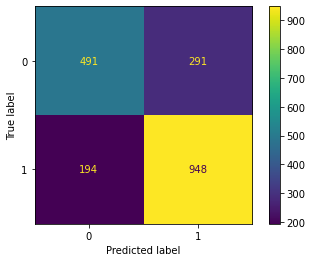

In [144]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_label, tv_lr_test_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [145]:
def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                codes=level_labels)) 
    return cm_frame

In [146]:
display_confusion_matrix(test_label, tv_lr_test_pred_1)

Predicted:     
                   1    0
Actual: 1        948  194
        0        291  491

In [147]:
# Method used to extract values from confusion matrix based on the indices
def sample_cf(indices, data_test):
    toxic = []
    for index in indices:
        toxic.append(data_test.iloc[index].sentence)
    return toxic

In [148]:
# Actual positive and predicted positive    
def true_positives(test_label, pred_test):
    indices = []
    for i in range(len(test_label)):
        if (test_label[i] == 1)  and (test_label[i] == pred_test[i]):
            indices.append(i)
    # Actual Toxic and predicted toxic
    return  indices

# Actual positive and predicted negative
def false_negative(test_label, pred_test ):
    indices = []
    for i in range(len(test_label)):
        if (test_label[i] == 1)  and (test_label[i] != pred_test[i]):
            indices.append(i)
        # Actual Toxic but predicted non-toxic
    return indices

# Actual negative and predicted positive
def false_positive(test_label, pred_test ):
    indices = []
    for i in range(len(test_label)):
        if (test_label[i] != 1)  and (test_label[i] != pred_test[i]):
            indices.append(i)
        # Actual Non-Toxic but predicted toxic
    return indices

# Actual negative and predicted negative
def true_negative(test_label, pred_test ):
    indices = []
    for i in range(len(test_label)):
        if (test_label[i] != 1)  and (test_label[i] == pred_test[i]):
            indices.append(i)
        # Actual Non-Toxic and predicted non-toxic
    return indices

In [149]:
indices_TP =true_positives(test_label ,tv_lr_test_pred_1)
print('True Positive indices >> ', indices_TP)
toxic_comment_TP = sample_cf(indices_TP, df_test)
print('Toxic comments identified as toxic >> ', toxic_comment_TP)

True Positive indices >>  [1, 4, 7, 9, 14, 19, 20, 21, 23, 24, 25, 26, 28, 29, 31, 33, 43, 46, 49, 50, 51, 52, 54, 55, 58, 59, 61, 62, 65, 68, 70, 71, 73, 76, 78, 80, 81, 82, 85, 86, 87, 89, 91, 92, 97, 102, 103, 104, 105, 107, 109, 111, 112, 113, 114, 115, 119, 120, 124, 125, 131, 132, 133, 134, 138, 139, 141, 142, 143, 146, 147, 149, 150, 151, 154, 156, 171, 173, 174, 176, 177, 179, 180, 181, 182, 186, 187, 188, 189, 190, 191, 192, 193, 195, 197, 205, 206, 207, 210, 213, 214, 216, 223, 224, 225, 226, 231, 232, 236, 241, 242, 243, 252, 255, 262, 263, 265, 267, 269, 270, 272, 273, 275, 277, 278, 280, 284, 285, 286, 288, 290, 291, 293, 294, 297, 298, 299, 300, 301, 302, 303, 305, 309, 311, 316, 317, 318, 319, 320, 321, 323, 324, 325, 326, 327, 329, 331, 332, 334, 335, 336, 337, 338, 340, 341, 343, 346, 347, 350, 351, 352, 353, 355, 356, 358, 360, 364, 365, 368, 372, 373, 374, 375, 376, 378, 379, 381, 384, 388, 389, 390, 392, 395, 396, 398, 399, 400, 402, 403, 404, 405, 407, 409, 410, 41

In [172]:
indices_FP =false_positive(test_label ,tv_lr_test_pred_1)
print('False Positive indices >> ', indices_FP)
toxic_comment_FP = sample_cf(indices_FP, df_test)
print('Non Toxic comments identified as toxic >> ', toxic_comment_FP[2])

False Positive indices >>  [3, 6, 8, 12, 16, 18, 30, 39, 48, 53, 60, 64, 66, 75, 77, 79, 90, 94, 98, 106, 108, 116, 122, 123, 126, 137, 144, 145, 157, 159, 160, 161, 167, 169, 170, 172, 175, 178, 185, 196, 199, 203, 208, 211, 212, 219, 227, 228, 229, 233, 245, 250, 251, 257, 258, 261, 264, 268, 274, 281, 282, 283, 289, 295, 296, 304, 306, 308, 310, 313, 315, 330, 333, 342, 345, 348, 349, 354, 359, 361, 362, 371, 377, 385, 387, 391, 393, 401, 406, 428, 438, 447, 449, 457, 458, 487, 508, 509, 523, 526, 536, 541, 543, 545, 548, 549, 560, 564, 566, 568, 606, 624, 632, 638, 641, 646, 652, 658, 659, 678, 679, 687, 707, 712, 713, 721, 737, 738, 743, 753, 782, 784, 800, 808, 809, 812, 813, 814, 818, 821, 823, 825, 826, 840, 851, 852, 859, 863, 865, 870, 872, 873, 874, 885, 889, 894, 902, 906, 909, 934, 940, 943, 945, 947, 949, 963, 969, 979, 986, 997, 1000, 1004, 1008, 1010, 1015, 1025, 1053, 1064, 1070, 1087, 1119, 1121, 1126, 1127, 1132, 1137, 1144, 1163, 1170, 1172, 1174, 1184, 1185, 1191, 

In [178]:
indices_FN =false_negative(test_label ,tv_lr_test_pred_1)
print('False negative indices >> ', indices_FN)
toxic_comment_FN = sample_cf(indices_FN, df_test)
print('Toxic comments identified as non-toxic >> ', toxic_comment_FN[2])

False negative indices >>  [10, 13, 57, 63, 72, 204, 209, 218, 220, 234, 248, 249, 253, 366, 382, 416, 425, 443, 454, 460, 463, 469, 470, 483, 495, 519, 552, 565, 609, 642, 655, 670, 677, 680, 793, 805, 846, 854, 855, 915, 925, 931, 936, 983, 1018, 1026, 1027, 1043, 1044, 1045, 1049, 1051, 1054, 1055, 1058, 1061, 1069, 1071, 1073, 1076, 1078, 1080, 1082, 1083, 1084, 1086, 1089, 1096, 1101, 1111, 1116, 1135, 1141, 1142, 1153, 1154, 1157, 1160, 1167, 1168, 1180, 1183, 1188, 1190, 1199, 1212, 1213, 1214, 1218, 1219, 1220, 1226, 1238, 1241, 1247, 1248, 1251, 1264, 1267, 1269, 1270, 1274, 1278, 1281, 1284, 1289, 1300, 1308, 1332, 1333, 1340, 1344, 1347, 1373, 1377, 1381, 1383, 1385, 1394, 1398, 1404, 1407, 1409, 1413, 1429, 1439, 1450, 1452, 1459, 1462, 1471, 1479, 1494, 1500, 1508, 1513, 1528, 1539, 1549, 1550, 1556, 1563, 1566, 1575, 1578, 1582, 1583, 1598, 1602, 1610, 1614, 1617, 1619, 1625, 1626, 1644, 1650, 1653, 1657, 1665, 1670, 1671, 1700, 1713, 1714, 1716, 1726, 1727, 1744, 1746, 1

In [173]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=1000, C=1, random_state=42)
lr.fit(tv_train_final_features,  train_final_label)
lr.coef_,lr.intercept_,lr.classes_

(array([[ 0.15598683,  0.16492113, -0.19364593, ..., -0.13280978,
         -0.13280978, -0.18801325]]),
 array([-0.35113794]),
 array([0, 1], dtype=int64))

In [162]:
len(lr.coef_[0])

18182

In [163]:
tv_train_final_features

<17305x18182 sparse matrix of type '<class 'numpy.float64'>'
	with 196346 stored elements in Compressed Sparse Row format>

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(ngram_range=(1,1),max_features=None, min_df=0.0, max_df=1.0,use_idf=True)
tv_train_features = tv.fit_transform(norm_train_final_corpus)
tv_test_features = tv.transform(norm_test_corpus)

In [167]:
from sklearn.feature_selection import mutual_info_classif
important = mutual_info_classif(tv_test_features, test_label)

In [168]:
d = pd.DataFrame([important, tv.get_feature_names()], index=['score', 'features']).T
d.sort_values(by=['score'], ascending=False)

,score,features
17564,0.124073,white
10979,0.0668227,nigger
9223,0.0643978,like
11917,0.0580435,peopl
5954,0.0533306,fuck
...,...,...
6999,0,headlight
7001,0,headquart
7002,0,headrag
7003,0,headscarv


In [175]:
d = pd.DataFrame([important, tv.get_feature_names(),lr.coef_[0]], index=['score', 'features','coefficients']).T
d.sort_values(by=['score'], ascending=False)

,score,features,coefficients
17564,0.124073,white,-1.97341
10979,0.0668227,nigger,9.92938
9223,0.0643978,like,1.13568
11917,0.0580435,peopl,-1.2239
5954,0.0533306,fuck,1.19448
...,...,...,...
6999,0,headlight,0.0373926
7001,0,headquart,0.365901
7002,0,headrag,0.0393781
7003,0,headscarv,0.146395
